# Load data

In [1]:
import numpy as np
import pandas as pd
import anndata
import os

In [46]:
import torch
import pickle
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "/bigstore/GeneralStorage/fangming/projects/visctx/propose")
from propose import PROPOSE, HurdleLoss, ExpressionDataset
from propose import models, Accuracy

from dredFISH.Utils import basicu
from dredFISH.Utils.__init__plots import *

In [3]:
ddir = '/bigstore/GeneralStorage/fangming/projects/visctx/data_dump/counts/'
resdir = '/bigstore/GeneralStorage/fangming/projects/visctx/data_dump/test_propose'
f = os.path.join(ddir, "P38_1a2a_glut.h5ad")
adata = anndata.read(f)
adata

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 3751 × 53547
    obs: 'cov', 'covfactor', 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'layer', 'Type', 'Subclass'
    var: 'id'

In [4]:
!ls $resdir

classification_metric.pkl     fig_L234_allgenes_sep14.pdf
classification_metric_v2.pkl  propose_class_results.pkl
eval_L234_allgenes_sep13.pkl  propose_class_results_v2.pkl
eval_L234_allgenes_sep14.pkl  res_L234_allgenes_sep13.pkl
fig_L234_allgenes_sep13.pdf   res_L234_allgenes_sep14.pkl


In [5]:
# Plot results
with open(os.path.join(resdir, 'eval_L234_allgenes_sep14.pkl'), 'rb') as f:
    results = pickle.load(f)
num_features = list(results['PROPOSE-Class'].keys())

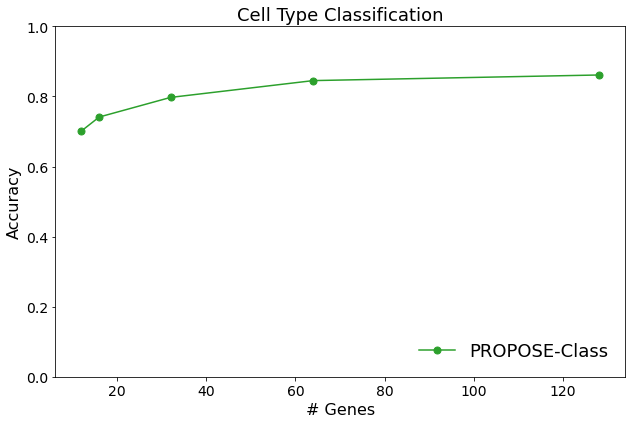

In [6]:
# Make plot
plt.figure(figsize=(9, 6))
plt.plot(num_features, [results['PROPOSE-Class'][num] for num in num_features],
         marker='o', markersize=7, color='C2', label='PROPOSE-Class')
plt.legend(loc='lower right', fontsize=18, frameon=False)
plt.tick_params(labelsize=14)
plt.title('Cell Type Classification', fontsize=18)
plt.xlabel('# Genes', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.tight_layout()
plt.ylim([0,1])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


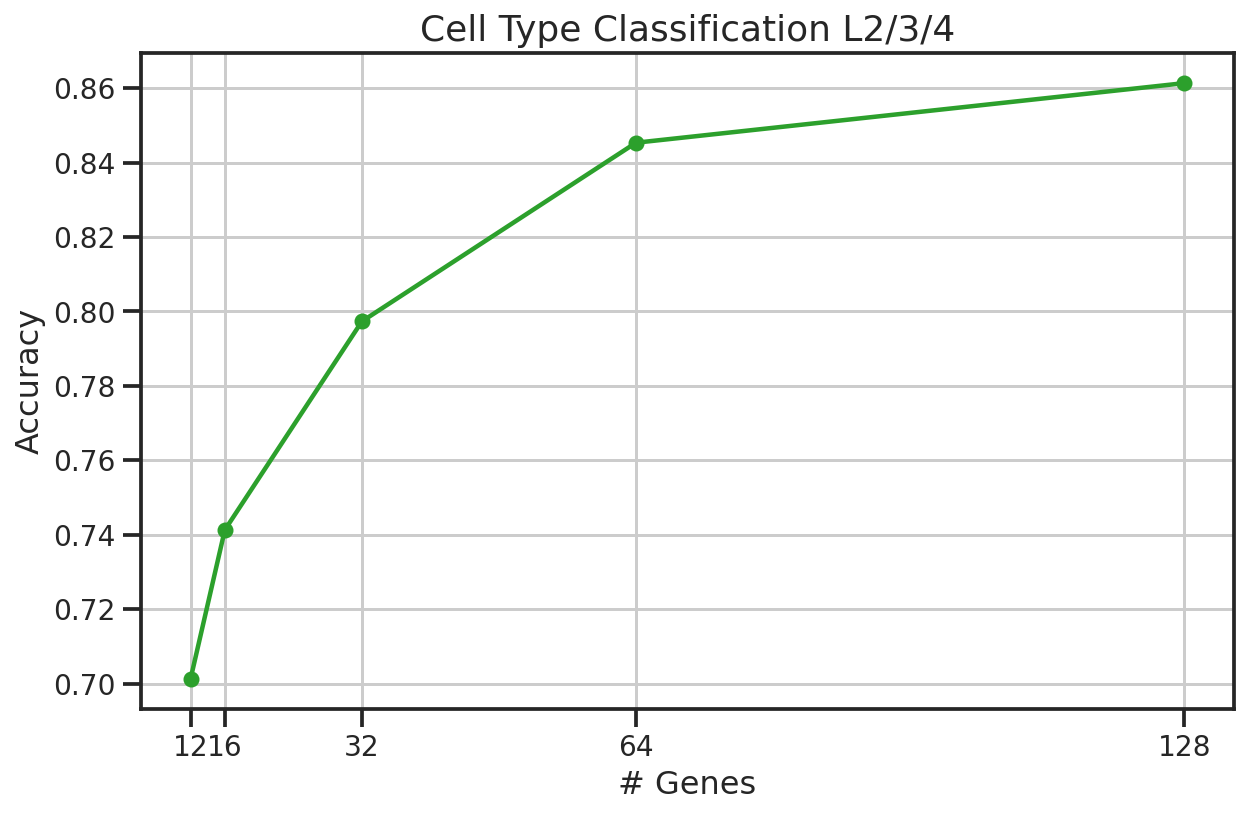

In [13]:
# Make plot
plt.figure(figsize=(9, 6))
plt.plot(num_features, [results['PROPOSE-Class'][num] for num in num_features],
         marker='o', markersize=7, color='C2',)
plt.legend(loc='lower right', fontsize=18, frameon=False)
plt.tick_params(labelsize=14)
plt.title('Cell Type Classification L2/3/4', fontsize=18)
plt.xlabel('# Genes', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.tight_layout()
# plt.ylim([0,1])
plt.xticks(num_features)
plt.show()

In [14]:
results

{'PROPOSE-Class': {128: 0.8613333106040955,
  64: 0.8453333377838135,
  32: 0.797333300113678,
  16: 0.7413333058357239,
  12: 0.7013333439826965}}

# get gene names

In [28]:
# which genes
with open(os.path.join(resdir, 'res_L234_allgenes_sep14.pkl'), 'rb') as f:
    res = pickle.load(f)
res

{128: array([  323,  1723,  1776,  2007,  2141,  2185,  2242,  2491,  3156,
         3688,  4574,  5407,  5695,  6814,  6924,  6925,  7114,  7125,
         7716,  9807, 10165, 10484, 10700, 10701, 10907, 11893, 11934,
        12007, 12019, 12536, 12580, 12678, 12838, 12849, 12899, 12978,
        13028, 13193, 13322, 13608, 13752, 13963, 14019, 14556, 14580,
        14589, 14749, 15728, 16469, 17225, 17251, 17584, 17655, 18900,
        19058, 19707, 19844, 20645, 20916, 21307, 21772, 22979, 24045,
        24046, 24112, 24375, 24973, 24992, 25037, 25491, 25897, 26666,
        26669, 26701, 26712, 26984, 27436, 27766, 28536, 30200, 30240,
        30894, 31093, 31348, 31434, 32212, 32278, 33536, 34344, 34598,
        34919, 35146, 35738, 37817, 37838, 37870, 38711, 38823, 39423,
        39695, 40199, 41046, 42177, 42213, 42229, 43289, 43346, 45102,
        45195, 45281, 45658, 45879, 45916, 46195, 46364, 47376, 47764,
        47965, 48195, 49430, 49623, 49685, 49709, 51991, 52022, 52068,
 

In [54]:
ddir = '/bigstore/GeneralStorage/fangming/projects/visctx/data_dump/counts/'
f = os.path.join(ddir, "P38_1a2a_glut.h5ad")
gene_names = anndata.read(f).var.index.values

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [30]:
gene_names[res[12]]

array(['Cntnap5a', 'Necab1', 'Thsd7a', 'Aldh1l1', 'Sox5', 'Nell1',
       'Hs3st4', 'Grm1', 'Rhbdl3', 'Iqgap2', 'Ptprm', 'Rorb'],
      dtype=object)

In [31]:
gene_names[res[16]]

array(['Cntnap5a', 'Igfn1', 'Tshz2', 'Gucy1a1', 'Necab1', 'Grm8', 'Nell1',
       'Syt17', 'Hs3st4', 'Grm1', 'Cdh13', 'Kirrel3', 'BC006965', 'Cplx2',
       'Fst', 'Ptprm'], dtype=object)

In [32]:
gene_names[res[32]]

array(['Sgpp2', 'Cntnap5a', 'Rgs8', 'Cnih3', 'Gm13629', 'Pde1a', 'Ryr3',
       'Tshz2', 'Prrg1', 'Il1rapl2', 'Kcnab1', 'Olfm3', 'Grik3', 'Parm1',
       'Fras1', 'Ttc28', 'Cpne9', 'Sox5', 'Gabrg3', 'Grm1', 'Man1a',
       'Kirrel3', 'Sgcd', 'Adamts2', 'Col23a1', 'Rhbdl3', 'Ankfn1',
       'Matn2', 'Ano6', 'Grik1', 'Ptprm', 'Slc6a7'], dtype=object)

In [33]:
gene_names[res[64]]

array(['March4', 'Cntnap5a', 'Ccdc3', 'Itga8', 'Ntng2', 'Pla2g4e',
       'Kcnip3', 'Tshz2', 'Gm26883', 'Tenm1', '4930419G24Rik', 'Kcnab1',
       'A330015K06Rik', 'Olfm3', 'Cnr1', 'Raver2', 'Gm2164', 'Grik3',
       'Ptpru', 'Gm43175', 'Kctd8', 'Parm1', 'Ttc28', 'Chrm2', 'Aldh1l1',
       'Cpne9', 'Sox5', 'Prkcg', 'Gabrg3', 'Hs3st4', 'Stx4a', 'Grm1',
       'Man1a', 'Kitl', 'Msrb3', 'Prag1', 'Glra3', 'Gfra2', 'Dpy19l1',
       'Kirrel3', 'Sgcd', 'Adamts2', 'Rhbdl3', 'Ankfn1', 'Hap1',
       'BC006965', 'Slc35b3', 'Iqgap2', 'Sv2c', 'Lifr', 'Dnajc21',
       'Gm2824', 'Enpp2', 'Wisp1', 'Lynx1', 'Tmem117', 'Ano6', 'P3h2',
       'St3gal6', 'Ptprm', 'Galnt14', 'Sncaip', 'Slc6a7', 'Ccbe1'],
      dtype=object)

In [34]:
gene_names[res[128]]

array(['Col19a1', 'D1Ertd622e', 'Cdh20', 'Nckap5', 'Cntn2', 'Adora1',
       'Igfn1', 'Rgs8', 'Cnih3', 'Itga8', 'Ccdc148', 'Syt13', 'Ryr3',
       'Cdh22', 'Tshz2', 'Gm26883', 'Cdh4', 'Osbpl2', 'Pgrmc1', 'Mid1',
       '4930419G24Rik', 'Lhfp', 'Kcnab1', 'A330015K06Rik', 'Gucy1a1',
       'Ntng1', 'Olfm3', 'Dpyd', '6530403H02Rik', 'Gm30382', 'St6galnac5',
       'Wls', 'Necab1', 'Calb1', 'Nkain3', 'Epha7', 'Cnr1', 'Gm12394',
       'Tbc1d2', 'Whrn', 'Ttc39b', 'Nfia', 'Raver2', 'Gm2164', 'Rspo1',
       'Grik3', 'Ptpru', 'Sema3a', 'Ppargc1a', 'Fras1', 'Antxr2', 'Ttc28',
       'Sart3', 'Thsd7a', 'Grm8', 'Chn2', 'Snca', 'Aldh1l1', 'Cpne9',
       'Gm26673', 'Sox5', 'Tmem145', 'Nell1', 'Nell1os', 'Gabrg3',
       'Gm44643', 'Me3', 'Sytl2', 'Rab30', 'Cckbr', 'Hs3st2', 'Ust',
       'Sash1', '4930598N05Rik', 'Grm1', 'Tmem200a', 'Slc35f1', 'Gm15398',
       'Kitl', 'Glra3', 'Gm26905', 'Tox3', 'A330008L17Rik', 'Clec18a',
       'Cdh13', 'Anxa11', 'Gm48003', 'Xkr6', 'Trpc6', 'Pde4a', 'Siae',
  

# get heatmap

In [57]:
def rename_clsts(x):
    thedict = {
        'L2/3_A': 'L2/3_B',
        'L2/3_B': 'L2/3_A',
    }
    if x in thedict.keys():
        return thedict[x]
    else:
        return x

In [60]:
f = '../data_dump/P38_glut.h5ad'
adata = anndata.read(f)
adata

AnnData object with n_obs × n_vars = 10485 × 30869
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'layer', 'Type', 'Subclass'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Type_colors', 'cluster_colors', "dendrogram_['leiden']", 'hvg', 'layer_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [63]:
adata = adata[adata.obs['cluster'].str.contains(r'^L2|L4')]
adata.obs['cluster'] = adata.obs['cluster'].apply(rename_clsts) 

# zscore
adata.X = basicu.zscore(adata.X, axis=0)
adata

Trying to set attribute `.obs` of view, copying.
/bigstore/GeneralStorage/fangming/projects/dredfish/packages/dredFISH/dredFISH/Utils/basicu.py:314: RuntimeWarning: invalid value encountered in true_divide
  return (v-np.mean(v, **kwargs))/(np.std(v, **kwargs))


AnnData object with n_obs × n_vars = 5837 × 30869
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'layer', 'Type', 'Subclass'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Type_colors', 'cluster_colors', "dendrogram_['leiden']", 'hvg', 'layer_colors', 'leiden', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [67]:
Xk, xclsts = basicu.group_mean(adata.X, adata.obs['cluster'])
Xk = np.array(Xk)
Xk = pd.DataFrame(Xk, index=xclsts, columns=adata.var.index)
Xk.shape, xclsts.shape, xclsts

((6, 30869),
 (6,),
 array(['L2/3_A', 'L2/3_B', 'L2/3_C', 'L4_A', 'L4_B', 'L4_C'], dtype=object))

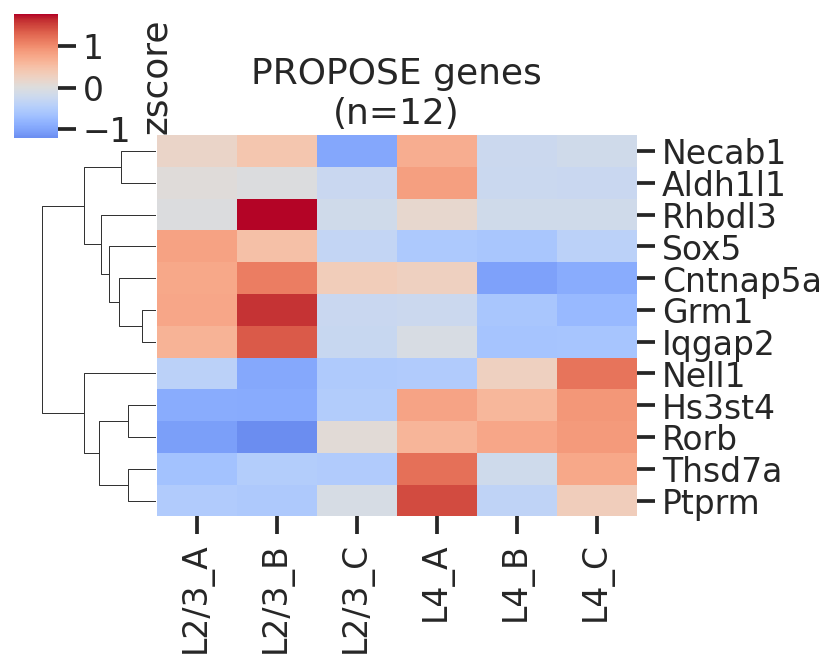

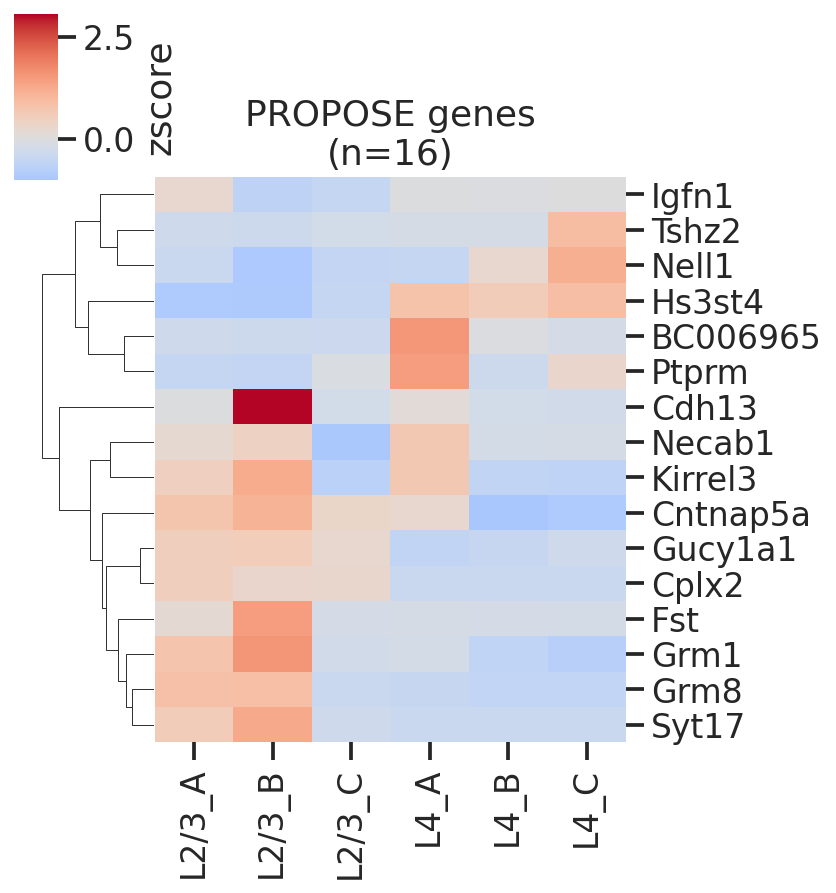

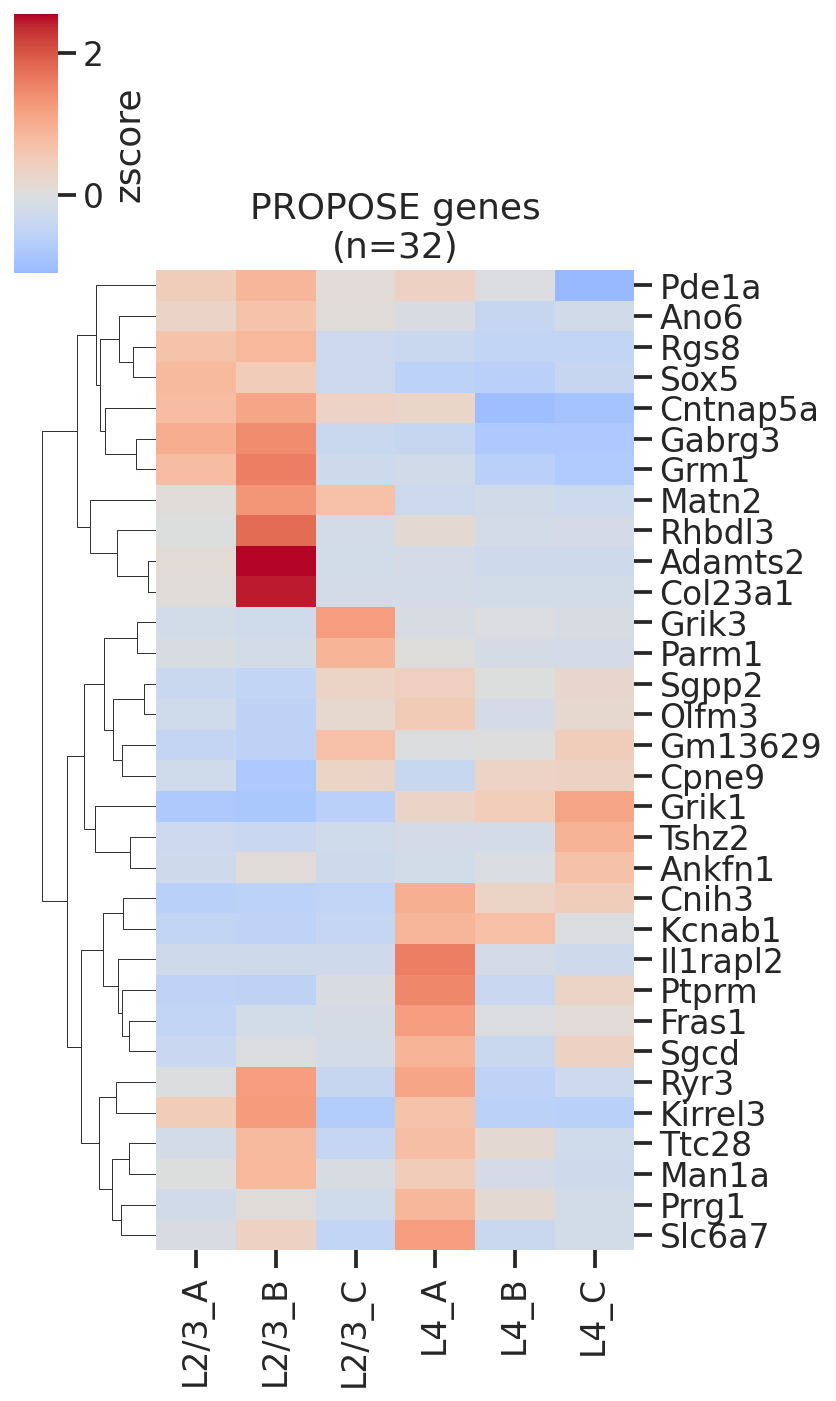

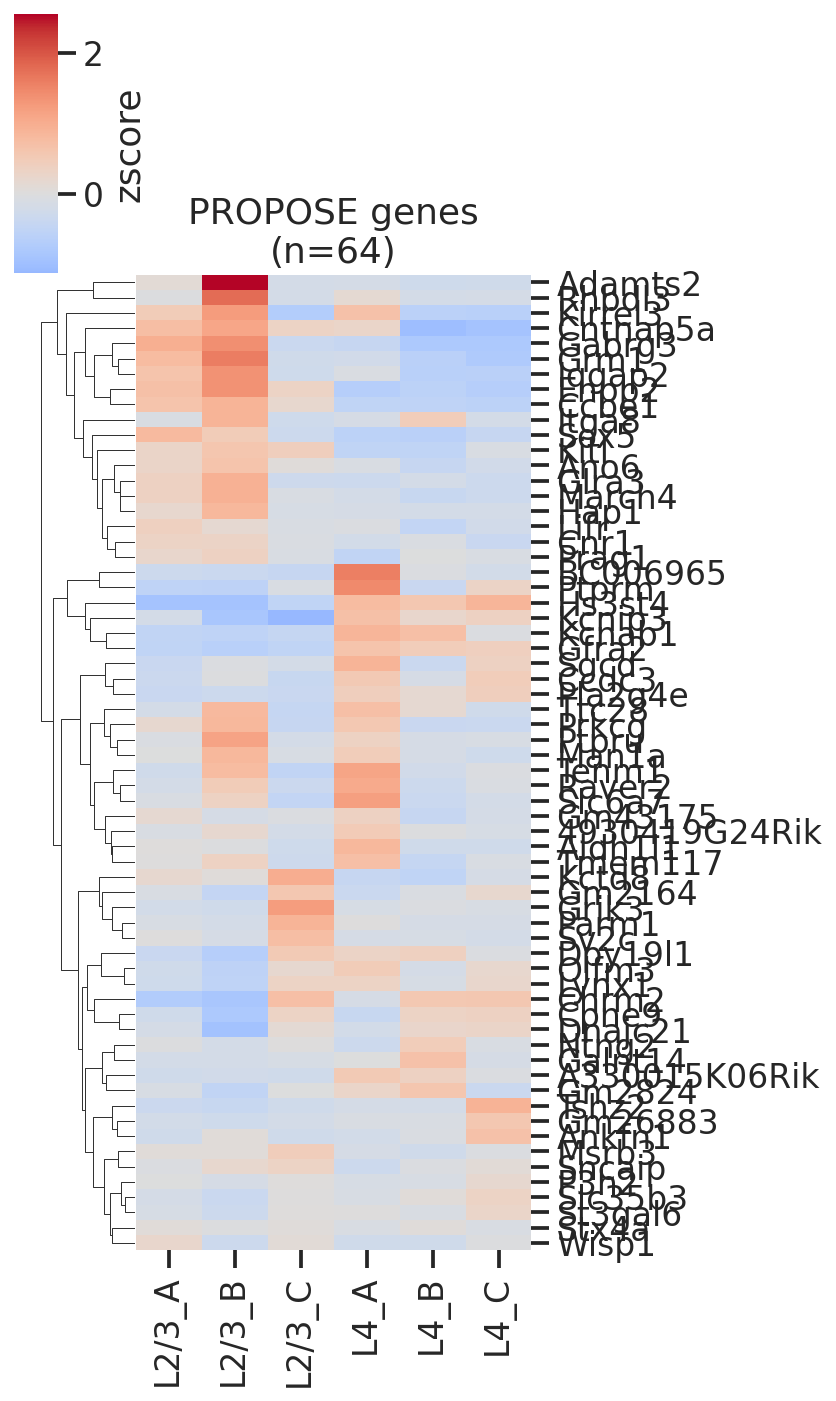

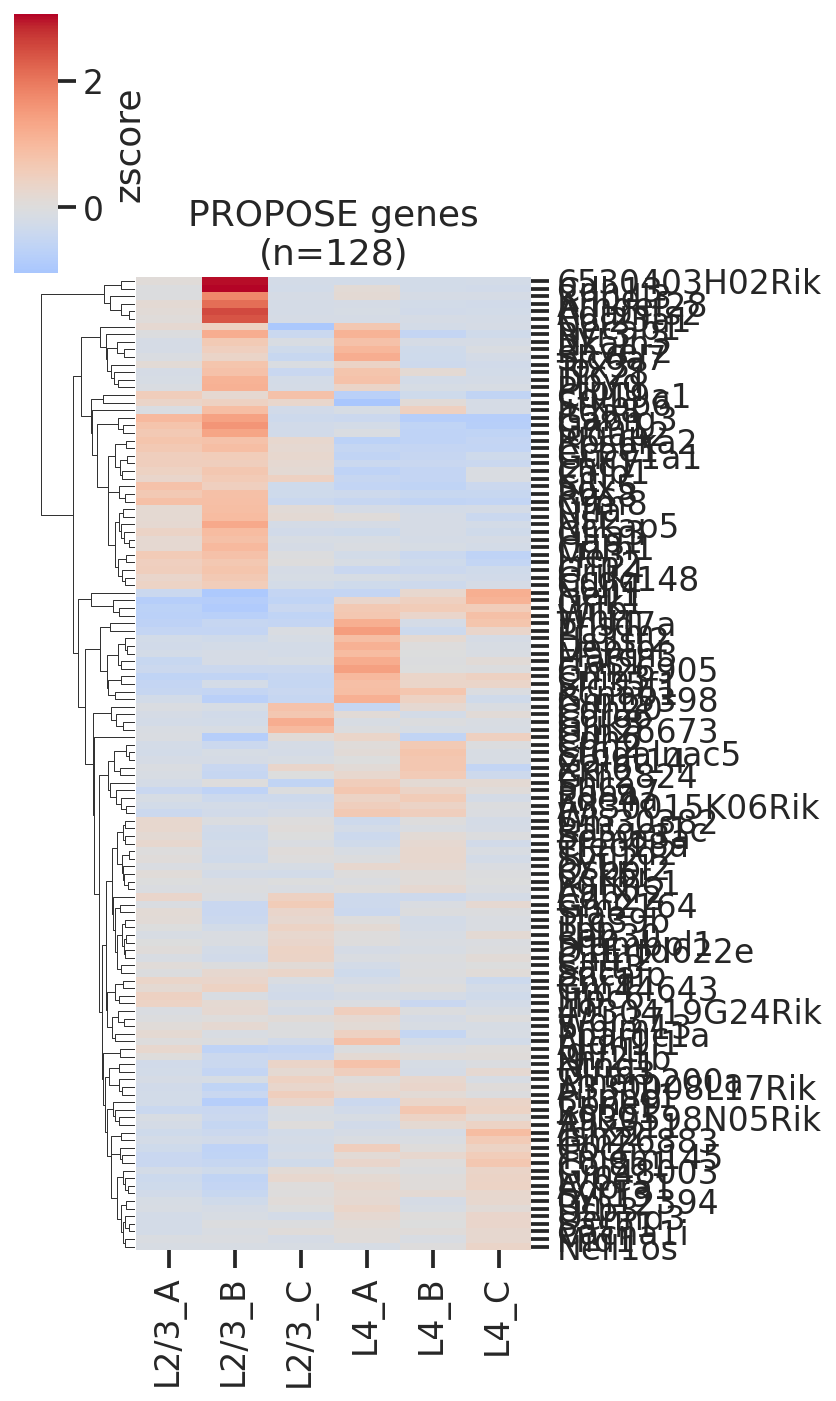

In [87]:
for num in num_features[::-1]:
    X_s = Xk[gene_names[res[num]]].T
    g = sns.clustermap(X_s,
                    col_cluster=False,
                    yticklabels=True,
                    cmap='coolwarm',
                    center=0,
                    # vmax=1.5, vmin=-1.5,
                    # vmax=2, vmin=-2,
                    figsize=(6,min(10, num*0.4)), 
                    cbar_kws=dict(label='zscore')
                   )
    g.ax_heatmap.set_title(f"PROPOSE genes\n(n={len(X_s)})")
    plt.show()